In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

from metrics import ModelChooser
from helpers import plot_1d

In [2]:
RANDOM_SEED = 7

LR_ARGS = {"solver": 'lbfgs', "max_iter": 10000}
RF_ARGS = {"n_estimators": 40, "n_jobs": -1, "random_state": RANDOM_SEED}


MC = ModelChooser()

In [3]:
def train_lr(x_train, y_train, x_test, y_test):
    lr = LogisticRegression(**LR_ARGS)
    lr.fit(x_train, y_train)
    
    ppreds_t = lr.predict_proba(x_train)
    preds_t = np.argmax(ppreds_t, axis=1)
    ppreds_v = lr.predict_proba(x_test)
    preds_v = np.argmax(ppreds_v, axis=1)
    
    print("Train acc:", accuracy_score(y_train, preds_t))
    print("Test acc:", accuracy_score(y_test, preds_v))
    
def train_rf(x_train, y_train, x_test, y_test):
    rf = RandomForestClassifier(**RF_ARGS)
    rf.fit(x_train, y_train)
    
    ppreds_t = rf.predict_proba(x_train)
    preds_t = np.argmax(ppreds_t, axis=1)
    ppreds_v = rf.predict_proba(x_test)
    preds_v = np.argmax(ppreds_v, axis=1)
    
    print("Train acc:", accuracy_score(y_train, preds_t))
    print("Test acc:", accuracy_score(y_test, preds_v))
    

In [4]:
bcd = datasets.load_breast_cancer()

In [5]:
x = bcd['data']
y = bcd['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)

In [6]:
train_lr(x_train, y_train, x_test, y_test)

Train acc: 0.964824120603015
Test acc: 0.9590643274853801


In [7]:
train_rf(x_train, y_train, x_test, y_test)

Train acc: 1.0
Test acc: 0.9649122807017544


In [8]:
MC.decide(x, y)

Feature distribution summary:
 {'logit': [0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 22, 23, 25, 26, 27], 'internal_sep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'half-logit': [1, 4, 8, 15, 16, 17, 19, 21, 24, 28, 29]}

Logistic Regression is the better option


In [9]:
def choose_one(y):
    y_orig = y.copy()
    y_working = y_orig.copy()
    classes = np.unique(y_orig)
    res = []
    for c in classes:
        if c == 0:
            # cant directly set to 0 as c is 0, and cant make c 1 cause some other classes may be 1
            y_working[y_orig!=c] = -1
            y_working[y_orig==c] = 1
            y_working[y_orig!=c] = 0
        else:
            y_working[y_orig!=c] = 0
            y_working[y_orig==c] = 1
        res.append(y_working.copy())
    return res

In [10]:
ird = sklearn.datasets.load_iris()

In [25]:
opts = choose_one(ird['target'])

In [26]:
x = ird['data']
for y in opts:
    print("Decision:")
    MC.decide(x, y)
    print('\n')
    
    print("LR:")
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
    train_lr(x_train, y_train, x_test, y_test)
    print("\nRF:")
    train_rf(x_train, y_train, x_test, y_test)
    print("-----------\n")

Decision:
Feature distribution summary:
 {'logit': [0, 1, 2, 3], 'internal_sep': [0, 1, 2, 3], 'half-logit': []}

Logistic Regression is the better option


LR:
Train acc: 1.0
Test acc: 1.0

RF:
Train acc: 1.0
Test acc: 1.0
-----------

Decision:
Feature distribution summary:
 {'logit': [], 'internal_sep': [0, 1, 2, 3], 'half-logit': [1]}

Random Forest is the better option


LR:
Train acc: 0.7904761904761904
Test acc: 0.6222222222222222

RF:
Train acc: 1.0
Test acc: 0.9111111111111111
-----------

Decision:
Feature distribution summary:
 {'logit': [0, 2, 3], 'internal_sep': [0, 1, 2, 3], 'half-logit': [1]}

Logistic Regression is the better option


LR:
Train acc: 0.9904761904761905
Test acc: 0.9111111111111111

RF:
Train acc: 1.0
Test acc: 0.9111111111111111
-----------



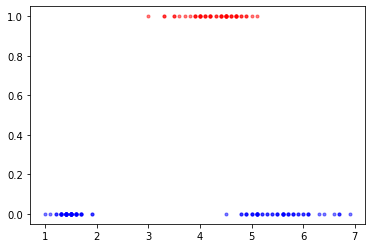

In [30]:
plot_1d(x, opts[1], 2)

In [14]:
wd = sklearn.datasets.load_wine()

In [15]:
opts = choose_one(wd['target'])

In [16]:
x = wd['data']
for y in opts:
    print("Decision:")
    MC.decide(x, y)
    print('\n')
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)
    lr = train_lr(x_train, y_train, x_test, y_test)
    train_rf(x_train, y_train, x_test, y_test)
    print("-----------\n")

Decision:
Feature distribution summary:
 {'logit': [0, 3, 5, 6, 12], 'internal_sep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'half-logit': [2, 4, 7, 8, 9, 10, 11]}

Logistic Regression is the better option


Train acc: 0.9919354838709677
Test acc: 0.9814814814814815
Train acc: 1.0
Test acc: 1.0
-----------

Decision:
Feature distribution summary:
 {'logit': [0, 1, 4, 9, 12], 'internal_sep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'half-logit': [2, 3, 8, 10, 11]}

Logistic Regression is the better option


Train acc: 0.9838709677419355
Test acc: 0.9629629629629629
Train acc: 1.0
Test acc: 1.0
-----------

Decision:
Feature distribution summary:
 {'logit': [5, 6, 10, 11], 'internal_sep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'half-logit': [1, 2, 3, 7, 8, 9]}

Logistic Regression is the better option


Train acc: 1.0
Test acc: 0.9629629629629629
Train acc: 1.0
Test acc: 1.0
-----------



In [17]:
def to_classification(y):
    y_out = np.zeros(len(y))
    m = y.mean()
    y_out[y >= m] = 1
    return y_out

In [18]:
bd = sklearn.datasets.load_boston()

In [19]:
x = bd['data']
y = to_classification(bd['target'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED)

In [20]:
MC.decide(x, y)

Feature distribution summary:
 {'logit': [2, 5, 6, 12], 'internal_sep': [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'half-logit': [0, 1, 4, 7, 8, 9, 10, 11]}

Logistic Regression is the better option


In [21]:
train_lr(x_train, y_train, x_test, y_test)

Train acc: 0.9067796610169492
Test acc: 0.8486842105263158


In [22]:
train_rf(x_train, y_train, x_test, y_test)

Train acc: 1.0
Test acc: 0.8486842105263158
